In [1]:
from google.colab import files
uploaded= files.upload()
filename= list(uploaded.keys())[0]
filename

Saving Fish.csv to Fish.csv


'Fish.csv'

# Logistic Regression (로지스틱 회귀분석)


- 지도학습(Supervised machine learning) 알고리즘 
  - 데이터 분류(Classification)에 활용, 클래스 혹은 이벤트 등 
  - Binary Classification problems 에서 사용 
  - Output 형태 (주로 두개로 나눠 질 수 있음)
    - Yes/No, Pass/Fail, Win/Lose, Cancerous/Non-cancerous, etc


- 로지스틱 회귀분석의 유형 
  - Simple Logistic Regression 
    - 변수(x)1개 사용
  - Multiple Logistic Regression 
    - 여러 변수(x)사용 


- 확률(Odds)을 이용해서 데이터의 정확성을 판단 
  - **Odds** : the ratio of the probability of and event occuring to the probability of and evenet not occuring
  $$ Odds = \frac{p}{(1-p)}$$

  - <span style="color:red">**Sigmoid fuction**</span>: Equation for a logistic model 
  $$ Sigmoid function = \frac{1}{1+e^{-z}}$$

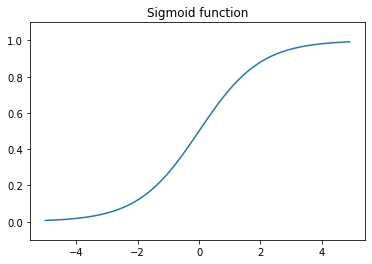

In [27]:
# sigmoid function : target(Y)값이 항상 (0 ~ 1)사이에 위치

import numpy as np

def sigmoid(x):
    return 1 / (1 +np.exp(-x))
 
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title('Sigmoid function')
plt.show()

### 로지스틱 회귀 분석을 이용한 데이터 분석 
- Reference : Fish Dataset from Kaggle 

In [2]:
import pandas as pd 

fish = pd.read_csv(filename)
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


* 데이터 확인하기

In [4]:
# Species 종류확인 
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
# 결측치 확인하기 
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

* train, test를 구성하기 위한 준비(전처리)

In [8]:
# label, target(Y) = Species 
# Features(X) = Weight, Length 1- 3, Height, Width

X = fish.iloc[:, 1:]
y = fish.loc[:, 'Species']

In [9]:
# X 범위를 scaled 시킴 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [12]:
# Label Encoding 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

* train, test 데이터로 나누고 학습하기

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [14]:
# Model Building 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# training the model 
clf.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# predicting the output
y_pred = clf.predict(X_test)

## 정확도 평가 ✔
- Cross-Entropy Loss Function 
  - 결과값이 '확률값'인 **classification mdoel** 평가에 사용
  - Over-fitting 포인트에서 평가 STOP ⛔️

In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : {:.2f}%'. format(accuracy * 100))

Accuracy : 81.25%


* 시각화해서 확인하기

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix')

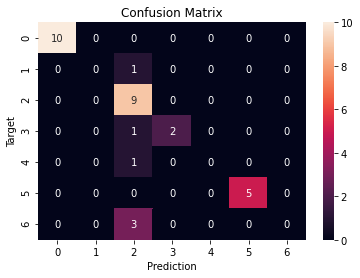

In [22]:
# 시각화해서 확인하기 (Confusion matrix)

from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

### 로지스틱 회귀 분석을 이용한 데이터 분석 2
-  종양데이터 분류하기 

In [28]:
uploaded= files.upload()
filename= list(uploaded.keys())[0]
filename

Saving bdiag.csv to bdiag.csv


'bdiag.csv'

In [50]:
# 데이터 읽어오기
import pandas as pd 
data = pd.read_csv(filename)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
# diagnosis, radisu_mean만 사용하기 
data = data[['diagnosis','radius_mean','texture_mean']]
data.head()

,diagnosis,radius_mean,texture_mean
0,M,17.99,10.38
1,M,20.57,17.77
2,M,19.69,21.25
3,M,11.42,20.38
4,M,20.29,14.34


* 데이터 확인하기

In [36]:
# diagnosis 종류 확인하기 
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [37]:
# 결측지 데이터 확인 
data.isnull().sum()

diagnosis       0
radius_mean     0
texture_mean    0
dtype: int64

* train, test 데이터 전처리

In [39]:
# X = features (radius_mean, texture_mean)
# y= target (diagnosis)
X = data.iloc[:, 1:]
y = data.loc[:, 'diagnosis']

In [41]:
# Scaling the input 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [42]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

* train, test 데이터로 나눈 후 데이터 학습 

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=20)

In [44]:
# Model building 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Training the model 
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

* 결과 예측

In [45]:
y_pred = clf.predict(X_test)  

* 성능평가 (정확도 검사)

In [46]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 84.21%


* confusion metrics로 시각화 하기

Text(0.5, 1.0, 'Confusion Matrix for determining tumor')

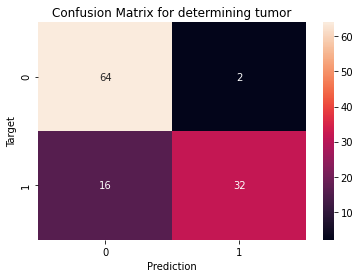

In [49]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix for determining tumor')

### 로지스틱 회귀 분석을 이용한 데이터 분석 2
-  종양데이터 분류하기, 더 많은 feature 사용하기

In [53]:
# mean 데이터 사용하기 
mean_val = data[['diagnosis','radius_mean','texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean', 'compactness_mean',
                 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
mean_val.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


* 데이터 확인하기

In [54]:
# 결측지 데이터 확인 
mean_val.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

* 데이터 전처리하기

In [56]:
# X = features (모든 mean data)
# y= target (diagnosis)
X = mean_val.iloc[:, 1:]
y = mean_val.loc[:, 'diagnosis']

In [57]:
# Scale 전처리

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [58]:
# Label Enconding 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

* train, test 데이터 분류 하기 및 데이터 분석

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 20)

In [60]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

* 결과값 예측

In [62]:
y_pred = clf.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 92.98%


Text(0.5, 1.0, 'Confusion Matrix for determining tumor with various features')

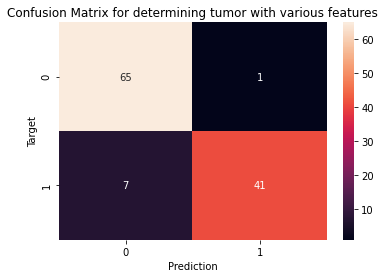

In [65]:
from sklearn.metrics import confusion_matrix

cf= confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix for determining tumor with various features')